In [1]:
import pandas as pd
import numpy as np

import sklearn
# These will be needed to prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seed for reproducibility
np.random.seed(42)

## Dealing with Data Problems

We will deal with the following: 
- Tidy Data
- Data Entry Problems
- Missing Values

Tidy datasets are easy to manipulate, model and visualize, and have a specific structure:
* each variable is a column
* each observation is a row
* each type of observational unit is a table

**pandas.melt()**: convert DataFrame Long <-> Wide

In [2]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [3]:
df_melt = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], var_name='myVarname', value_name='myValname')
df_melt

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [4]:
df = pd.read_csv("SLU12 - Support Vector Machines/data/airbnb.csv")

**Define elements' id**

`df_messy['song_id'] = range(len(df_messy))`

**Filter elements**

`df.isin()`  
`series.isin()`

**string variables**

`df.variable = df.variable.str.lower()`  
`df.variable = df.variable.str.strip()`  
`df.variable = df.variable.str.replace('original', 'replaced')`  
`df.variable = df.variable.replace({'original1': 'replaced1', 'original2': 'replaced2'})`  
`df.variable = df.variable.str.strip()`  
`df.variable = df.variable.str.cat()`  

### Duplicates

We can find duplicates using method [`duplicated()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html) and drop duplicated data with [`drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html).  

`duplicated_index = df.duplicated()`: Return boolean Series denoting duplicate rows, optionally only considering certain columns.  
`df = df.drop_duplicates()`

### Missing values

In order to find out what are the missing values, we can use method [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull), followed by [`sum`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html#pandas.DataFrame.sum) to count how many missing values do we have per column.  

`df.isnull()`  
`df.isnull().sum()`



What are the rows with at least one missing value?

For each row, we get True if any of the columns is null and False otherwise.  
`mask = data.isnull().any(axis=1)`  

We select the rows for which the mask is True.  
`data[mask]`

**Dropping missing values**

The simplest way to handle missing values is to simply discard the rows with missing values.

We can do this using method [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). This method drops all the rows with any missing values from a DataFrame.  

`df = df.dropna()`: Drop the rows where at least one element is missing.  
`df = df.dropna(axis='columns')`: Drop the columns where at least one element is missing.

**Replacing with the mean or median**

For numerical variables with missing values, we can replace the missing values with the mean or median of that variable. For this, we can use method [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) together with [`mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) or [`median`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html).  

`df.variable = df.variable.fillna(df.variable.median())`

**Pro tip**

We can call [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) with a dictionary and handle all these replacements at the same time!  

`values = {'variable1': df.variable1.median(), 'variable2': df.variable2.median()}`  
`df = df.fillna(value=values)`

## Preliminary data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
room_id                 13232 non-null int64
host_id                 13232 non-null int64
room_type               13232 non-null object
neighborhood            13232 non-null object
reviews                 13232 non-null int64
overall_satisfaction    13232 non-null float64
accommodates            13232 non-null int64
bedrooms                13232 non-null float64
price                   13232 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB


In [6]:
df.shape

(13232, 9)

In [7]:
df.sample(5)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
12148,18430120,123079348,Entire home/apt,Lumiar,0,0.0,4,2.0,95.0
8355,14035445,84062304,Private room,Parque das Nações,7,4.5,2,1.0,39.0
9040,14895450,69237427,Entire home/apt,São Vicente,20,5.0,5,3.0,87.0
63,124558,620702,Entire home/apt,Santa Maria Maior,126,4.5,6,2.0,75.0
9311,15269760,40814166,Entire home/apt,Belém,1,0.0,4,1.0,52.0


In [8]:
df.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13232.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284273,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123385,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


**.unique(), .nunique(), .value_counts()**

#### max, idxmax, min, idxmin

#### mean, median, mode

In [9]:
df.reviews.describe()

count    13232.000000
mean        29.130063
std         42.802762
min          0.000000
25%          2.000000
50%         11.000000
75%         39.000000
max        438.000000
Name: reviews, dtype: float64

#### `series.skew()`, `series.kurosis()`

## Plots and distributions

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

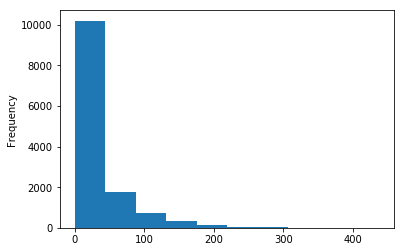

In [11]:
df.reviews.plot.hist();

We will limit the histogram because 92% of the rooms have below 100 reviews.

In [12]:
df.reviews[df.reviews<100].count()/df.reviews.count()

0.9239721886336155

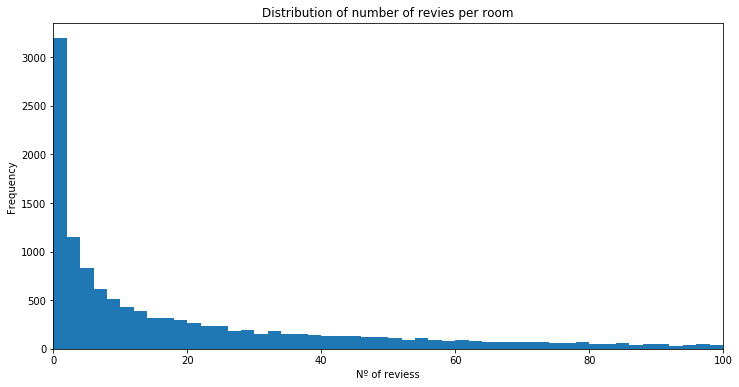

In [13]:
df.reviews.plot.hist(bins=np.arange(0,101,2), xlim=(0,100), figsize=(12, 6))
plt.xlabel('Nº of reviess')
plt.title('Distribution of number of revies per room');

## Variance, covariance, correlation

In [14]:
s1 = df.reviews
s2 = df.accommodates

**Variance**

In [15]:
s2.var()

5.261321086741796

In [16]:
s2.std()

2.293756980750532

**covariance**

In [17]:
s1.cov(s2)

0.7197875496125646

**correlation**

In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related (Pearson correlation).

There are multiple reasons to use correlation instead of covariance: 
> 1. Correlation is adimensional (unit free), so it's easier to think about (none of this "cm.years" nonsense) 
> 2. The value of correlation takes place between -1 and +1, while covariance lies between $-\infty$ and $+\infty$.
> 3. Correlation is not affected by the change in scale, while covariance is. 


Correlation is just normalized covariance. Normalized by what? By variance! 

$$ correlation = \frac{covariance(X, Y)}{\sqrt{Var(X) * Var(Y)}} $$

In [18]:
s1.corr(s2)

0.0073313699308307475

An alternative measure is **Spearman correlation**. It is computed using the ranking position of the variable values. The easiest way to think of this, is to forget about the actual values, and consider only their relative positions (ranks).
Spearman correlation is **much more resistant to outliers** and data entry problems than Pearson correlation.

In [19]:
s1.corr(s2, method='spearman')

0.08882378299880923

We can use Pandas DataFrame correlation method to compute de correlation table for the data.

In [20]:
df.corr()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
room_id,1.000000,0.595750,-0.496113,-0.308704,-0.057226,-0.030635,-0.068688
host_id,0.595750,1.000000,-0.286024,-0.179504,-0.071530,-0.050984,-0.048030
reviews,-0.496113,-0.286024,1.000000,0.431931,0.007331,-0.043997,-0.084228
overall_satisfaction,-0.308704,-0.179504,0.431931,1.000000,0.078501,0.019409,-0.126716
accommodates,-0.057226,-0.071530,0.007331,0.078501,1.000000,0.791061,0.300386
bedrooms,-0.030635,-0.050984,-0.043997,0.019409,0.791061,1.000000,0.302463
price,-0.068688,-0.048030,-0.084228,-0.126716,0.300386,0.302463,1.000000


## Model selection

## Model evaluation - bias and variance

**The bias-variance tradeoff**  

There is a trade-off between the bias (or underfitting) and variance (or overfitting). When increasing model complexity, bias is reduced while variance increases.  



### Train-test split (aka holdout method)  

---
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
```
---

The best possible solution is to leave a random subset of the data aside from the beginning to test our final model at the end.

<img src="SLU09 - Model Selection and Overfitting\media\test_set.png" width="300">

*Fig.: Test set illustrated, you holdout a significant chunk of the data for testing your model in the end*

With this method we can compute **two types evaluation metrics**:
1. In-sample-error (ISE) or **training error**: how well our model performs on the training data.
2. Out-of-sample error (OSE) or **testing error**: how well the model performs on previsouly unseen data and if it's picking up patterns that generalize well.  

Ideally, both training and test errors are low and close to one another.  

* *Underfitted* models tend to perform poorly on both train and test data, having large (and similar) in-sample- and out-of-sample errors.

* *Overfitting* is detected when a model that performs on training data but not quite so well in the test set: the bigger the gap, the greater the overfitting.  

Underfitted and overfitted examples:
> SuperConservative model error:  
> Train 12.67% | Test 10.5%  
---  
> WellBalanced model error:  
> Train:   7.0% | Test: 8.5%  
---  
> SuperFlexible model error:  
> Train:   0.0% | Test: 11.25%  

### Validation set (fixed set)  

----
```python
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)
del X_temp, y_temp
```
---

<img src="SLU09 - Model Selection and Overfitting\media\validation_set.png" width="300">

*Fig.: Validation set as compared with the holdout approach*

You might be wondering, how is this validation set different from the test set? Typically, a validation set will be used to tune parameters of the model, and then final evaluation of OSE will be done on the test set. 

We can use the validation set we created above to find the optimal value of *k* for our KNN classifier.

### Validation set (k-Fold Cross-validation)

---
```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10, scoring=classification_error)
mean_error = round(np.mean(scores), 2)
var_error = round(np.var(scores), 2)
```
---  

Test error results can be subject to great variability, especially for smaller datasets, depending on how we split the data (i.e., which observations go where).

Also, and quite obviously, holding out *more* data reduces the amount available for training, possibly leading us to *overestimate* the test error.

<img src="SLU09 - Model Selection and Overfitting\media\cross_validation.png" width="600">

This way, we use every observation to both train and test out model: each fold is used once as validation, while the *k*-1 remaining folds form the training set. The mean of the error of every fold can be seen as a proxy for OSE.

## What evaluation metric to use?  

The `scikit-learn` package includes most of the **validation metrics for classification** we will ever use (which can mostly found [here](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). 

The validation metrics for classification presented in this notebook are:
- Accuracy Score
- Confusion Matrix
- Precision
- Recall
- F1-Score
- Area Under the Receiver Operating Charactristic curve (AUROC)


<img src="score_metrics.PNG" width="800">  


In [21]:
# The sklearn metrics:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, roc_auc_score, roc_curve, \
                            confusion_matrix, precision_score, recall_score

### The confusion matrix   
---  
```python  
# this is scikit-learn's confusion matrix, we will use it a lot! 
confmat = confusion_matrix(y_true, y_pred)  
```  
---  

or

---
```python
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
```
---  

In binary classification, we either predicted 0 or 1, and were either right, or wrong. This matrix covers all cases.  

<img src="SLU11 - Metrics for Classification/data/confusion_mat_labelled.png" width="400">  

Deconstructing the logic: 
- The word ***"positive"*** or ***"negative"*** refers to what we **predicted**. 
- The word ***"true"*** or ***"false"*** refers to the real **observed class**.   

Reading **horizontal**: *class 0* and *class 1* **observations**.  
Reading **vertical**: *class 0* and *class 1* **predictions**.  
Reading **diagonal**: correct predictions ($\searrow$) ans wrong predictions ($\swarrow$).  
**Sum of squares**: total number of observations.  


### Different types of scores - static evaluation   

An usual behaviour for a binary classification algorithm is to predict the probability of each observation to be of *class 1* (e.g. `predict_proba(self, X)` [method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) in `sklearn.linear_model.LogisticRegression`) and then decide on the actual classification based on a previously set threshold ranging from 0 to 1. **For a given algorithm and a given threshold evaluation can be done using one of the following metrics**.

**Accuracy** is the total fraction of correct predictions.

$$ A = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions} = \frac{TP + TN}{TP + TN + FP + FN}  $$  

The **problem with accuracy**: If we have a more realistic dataset, where only ~0.4% of the population has *class 1* and we predict *class 0* for all observations we will get Accuracy > 99,6%.  

Conclusion: 
> **Accuracy is dangerous, as it is intuitive, but only works on well balanced datasets**


**Precision** is the ability to be a good classifier on the positive prediction. Appropriate when the cost of false positives is high. Leads to **higher decision thresholds**.  

$$ P = \frac{True\ Positive}{Positive\ predictions} = \frac{TP}{TP+FP} $$  

<img src="https://i.imgflip.com/2ombhi.jpg" width="250">

**Recall** is the ability to be a good classifier on the positive observations. Appropriate when the cost of false negatives is high. Leads to **lower decision thresholds**.  

$$ R = \frac{True\ Positive}{Positive\ observations} = \frac{TP}{TP+FN} $$  


<img src="https://i.imgflip.com/2ombqy.jpg" width="250">

**F1 score** is an attempt to find a "midground" between precision and recall. However it should be used with caution, as it assumes that both False Positives and False Negatives have the same impact on the end objective, which in a real scenario is rarely true.   

$$ F1 = 2\frac{P \times R}{P+R} $$

### ROC curve - dynamic evaluation   

(see the Wiki page for [sensitivity and specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity))

For a given clssification algorithm, **increasing the decision threshold** (from 0 to 1):  

- **Decreases** (from 1 to 0)
 - the <font color='green'>**true**</font> positive rate (or recall, $TPR = \frac{TP}{P} = \frac{TP}{TP + FN}$ ) - which is <font color='red'>**bad**</font>.
 - the <font color='red'>**false**</font> positive rate ($FPR = \frac{FP}{N} = \frac{FP}{FP + TN} $) - which is <font color='green'>**good**</font>.   
 
 
- **Increases** (from 0 to 1)
 - the <font color='green'>**true**</font> negative rate ($TNR = \frac{TN}{N} = \frac{TN}{TN + FP}$ ) - which is <font color='green'>**good**</font>.
 - the <font color='red'>**false**</font> negative rate ($FNR = \frac{FN}{P} = \frac{FN}{FN + TP}$ ) - which is <font color='red'>**bad**</font>. 
 

So **at low thresholds**, we have **lots of 1s (<font color='red'>False Positives</font>)**, and **at high thresholds** we have **lots of 0s (<font color='red'>False Negatives</font>)**.  
Also, **at low thresholds**, we have **lots of 1s (<font color='green'>True Positives</font>)**, and **at high thresholds** we have **lots of 0s (<font color='green'>False Negatives</font>)**.


The challenge here is to find a good **balance** between **higher TPR and TNR** and **lower FPR and FNR**.

<img src="https://www.medcalc.org/manual/_help/images/roc_intro2.png" width="300">  

<img src="https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0163111.g004&type=large" width="600">  



 

What is our TPR (True Positive Rate) and FPR (False Positive Rate) for each of these thresholds?  

The Receiver Operating Characteristic (ROC) curve is a very common (and important) metric for **binary classification problems** (when predicting 0 or 1).  

**Formally**, it is created by plotting the fraction of true positives out of the positives (TPR = true positive rate, a.k.a., sensitivity) vs. the fraction of false positives out of the negatives (FPR = false positive rate, or 1-specificity), at various threshold settings. Sklearn already provide us with all the tools:

In the following images we've drawn a perfect and random classifier overlayed with the original (ok-ish) one. 

<img src="SLU11 - Metrics for Classification/data/rocs.png" width="900">


## Data Sufficiency and Selection

The **usual loss function has a (serious) problem: it is prone to overfitting** because the optimization methods will adapt, as much as they can, the parameters to the training set.

$$J = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2$$

This problem can be tackled by means of regularization.

### Regularization:  
**1. Ridge** (L2 norm): 

$$J = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_2 \|\beta\|_2^2 = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_2 \sum_{k=1}^K \beta_k^2$$  

```python
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(normalize=True, alpha=0.0001, random_state=10)
clf.fit(X, y)
```

or

```python
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', C=1.0)
clf.fit(X, y)
```


**2. Lasso** (L1 norm):  

$$J = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_1 \|\beta\|_1^1 = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_1 \sum_{k=1}^K \left|\beta_k\right|$$


```python
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', C=1.0)
clf.fit(X, y)
```


**3. Elastic Net** (L1+L2 norm):  

```python
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='elasticnet', C=1.0, l1_ratio=1)
clf.fit(X, y)
```



Regularization awards a model's *goodness of fit* while penalizing *model complexity* automatically, while it is fitting the data!